# **준비**

In [2]:
import nltk
nltk.download('all')

from textblob import TextBlob

import os

import re

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

### poetry corpus 설치

In [3]:
pip install pycurl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.2/234.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycurl: filename=pycurl-7.45.2-cp310-cp310-linux_x86_64.whl size=310463 sha256=8e4f1ec720f1a5b2bcebe3524b72a3858328429b89ac17e4dd9f4a83b6df03bf
  Stored in directory: /root/.cache/pip/wheels/c7/41/22/c9eb70fde387ea0f16531256570754671f9c8571571982a4c0
Successfully built pycurl


In [4]:
!curl -O http://static.decontextualize.com/gutenberg-poetry-v001.ndjson.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 52.2M  100 52.2M    0     0  23.6M      0  0:00:02  0:00:02 --:--:-- 23.6M


In [5]:
import gzip, json
all_lines = []
for line in gzip.open("gutenberg-poetry-v001.ndjson.gz"):
    all_lines.append(json.loads(line.strip()))

### 텍스트 추출 정의

In [6]:
# 코퍼스에서 추출

def get_text_corpus(all_text):
    book_num = input()

    a = len(all_lines)

    text = []

    for i in range(0,a):
        each_line =  all_lines[i]
        dict_items = each_line.items()
        if list(dict_items)[1] ==  ('gid', book_num):
            text.append(each_line.get('s'))

    all_text.extend(text)

    return(all_text)

In [7]:
# text에서 추출

def get_text_txt(all_text):
    book_num2 = input()

    os.chdir('/content/drive/My Drive/Colab_Notebooks/syntax_project/poems')

    file = open(f'{book_num2}.txt')

    poems = file.read()

    file.close

    trimmed_poems =  re.sub("[\n0-9]", "", poems)

    text = trimmed_poems.split(',')

    all_text.extend([text])

    return all_text

### NaiveBayes Classifier 정의

In [8]:
def NBC(A, B):
    from nltk.tokenize import word_tokenize

    os.chdir('/content/drive/My Drive/Colab_Notebooks/syntax_project')
    training_source = pd.read_excel('training_source.xlsx')

    training_source_num = len(training_source)

    training_set = []

    for i in range(0, training_source_num):
        training_set_1 = (training_source[A].iloc[i], A)
        training_set.append(training_set_1)
        training_set_2 = (training_source[B].iloc[i], B)
        training_set.append(training_set_2)

    all_words = set(word.lower() for sentence in training_set
                   for word in word_tokenize(sentence[0]))

    all_words = []
    for sentence in training_set:
        for word in word_tokenize(sentence[0]):
            all_words.append(word.lower())

    t = [({word: (word in word_tokenize(x[0]))
        for word in all_words}, x[1]) for x in training_set]

    classifier = nltk.NaiveBayesClassifier.train(t)
    classifier.show_most_informative_features()

    count1 = 0
    count2 = 0

    for i in range(0, len(df)):
        test = str(df.iloc[i])
        text_features = {word.lower() : (word in word_tokenize(test.lower()))
                                            for word in all_words}

        result = classifier.classify(text_features)

        if result == A:
            count1 += 1

        elif result == B:
            count2 += 1


    print(f'{A}: {count1}')
    print(f'{B}: {count2}')

# **텍스트 분석**

### 작가/사조 별 텍스트 추출

In [24]:
all_text = []

In [ ]:
# 텍스트
get_text_txt(all_text)

In [ ]:
#코퍼스
get_text_corpus(all_text)

In [29]:
# 특수문자 제거
lower_text = str(all_text).lower()
no_punc_lower_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', ' ', lower_text)

text_analysis = TextBlob(no_punc_lower_text)

In [30]:
# 총 단어 수
words_num = len(text_analysis.words)
words_num

36944

### 단어로 주제 찾기

In [ ]:
# 불용어 제거
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

word_tokens = text_analysis.words

trimmed_text = []
for w in word_tokens:
    if w not in stop_words:
        trimmed_text.append(w)

# 총 단어 빈도 세기
trimmed_text_analysis = TextBlob(str(trimmed_text))
wordcount = trimmed_text_analysis.word_counts

trimmed_word_tokens = trimmed_text_analysis.words

# Top n개
from collections import Counter
Counter(wordcount).most_common(40)

### 감정 분석

In [32]:
# polarity [-1.0, 1.0] (negative, positive)
# subjectivity [0.0, 1.0] (objective, subjective)

text_analysis.sentiment

Sentiment(polarity=0.17342406673942554, subjectivity=0.5356000778899637)

### 형용사, 부사 사용 빈도

In [33]:
c = dict(text_analysis.tags)
d = c.values()
text_pos = list(d)

print("형용사,부사:", ((text_pos.count('JJ') + text_pos.count('JJR') + text_pos.count('JJS') + text_pos.count('RB') + text_pos.count('RBR') + text_pos.count('RBS'))/words_num)*100)

형용사,부사: 3.112819402338675


### 조동사 종류별 사용 빈도

In [34]:
may_count = text_analysis.word_counts['may']
might_count = text_analysis.word_counts['might']

can_count = text_analysis.word_counts['can']
could_count = text_analysis.word_counts['could']

would_count = text_analysis.word_counts['would']
should_count = text_analysis.word_counts['should']

will_count = text_analysis.word_counts['will']

must_count = text_analysis.word_counts['must']


print("약한:", ((may_count + might_count)/words_num)*100)
print("조금 약한:", ((can_count + could_count)/words_num)*100)
print("중간:", ((would_count + should_count)/words_num)*100)
print("조금 강한:", (will_count/words_num)*100)
print("강한:", (must_count/words_num)*100)

약한: 0.43850151580770896
조금 약한: 0.5494802944997834
중간: 0.47368990905153746
조금 강한: 0.32210913815504544
강한: 0.19488956258120396


### Wh-word 사용 빈도

In [36]:
print("wh-word:", ((text_pos.count('WDT') + text_pos.count('WP') + text_pos.count('WP$') + text_pos.count('WRB'))/words_num)*100)

wh-word: 0.0406019922044175


### negative word 사용 빈도

In [37]:
not_count = text_analysis.word_counts['not']
nt_count = text_analysis.word_counts["n't"]
none_count = text_analysis.word_counts['none']
nothing_count = text_analysis.word_counts['nothing']
nobody_count = text_analysis.word_counts['nobody']
nowhere_count = text_analysis.word_counts['nowhere']
nor_count = text_analysis.word_counts['nor']
neither_count = text_analysis.word_counts['neither']

print("negative words:", ((not_count + nt_count + none_count + nothing_count + nobody_count + nowhere_count + nor_count + neither_count)/words_num)*100)

negative words: 1.5185145084452143


### Ryhme

In [ ]:
!pip install pronouncing
import pronouncing

In [39]:
from collections import defaultdict
by_rhyming_part = defaultdict(lambda: defaultdict(list))

for i in range(0, len(trimmed_word_tokens)):
    match = re.search(r'(\b\w+\b)\W*$', trimmed_word_tokens[i])
    if match:
        last_word = match.group()
        pronunciations = pronouncing.phones_for_word(last_word)
        if len(pronunciations) > 0:
            rhyming_part = pronouncing.rhyming_part(pronunciations[0])
            by_rhyming_part[rhyming_part][last_word.lower()].append(trimmed_word_tokens[i])

rhyme_groups = [group for group in by_rhyming_part.values() if len(group) >= 4]

print("rhyme groups :", ((len(rhyme_groups) / words_num)*100))

rhyme groups : 0.563014291901256


# **시각화 재료**

### wordcloud

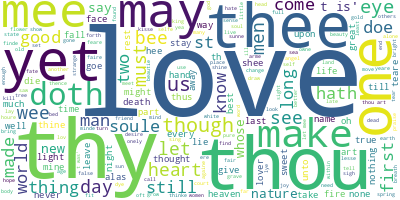

In [40]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(str(trimmed_word_tokens))

wordcloud.to_image()